<a href="https://www.kaggle.com/code/berouriaazulay/learning-titanic?scriptVersionId=139920977" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


  <h1>Exploring the Titanic Dataset</h1>
  <p>Welcome to this data science notebook, where we embark on a captivating journey through the Titanic dataset. This section provides an introduction to the project's context, problem statement, and objectives.</p>
    
  <h2>Project Overview:</h2>
  <p>This project centers around a comprehensive analysis of the Titanic dataset, which captures intricate details of passengers who were on board the Titanic's ill-fated voyage. The dataset offers insights into passenger demographics, ticket information, and survival outcomes.</p>

  <h2>Problem Statement:</h2>
  <p>The primary goal of this project is to develop a predictive model that can accurately determine the likelihood of survival for passengers based on various attributes. Our mission involves leveraging the dataset's features to uncover underlying patterns and factors that influenced survival rates.</p>

  <h2>Key Elements of the Project:</h2>
  <ul>
    <li>Dataset: The dataset comprises information about passengers, including attributes such as age, sex, ticket class, and more, which play a pivotal role in understanding survival dynamics.</li>
    <li>Prediction Task: We're constructing a sophisticated machine learning model to predict the probability of survival for each passenger, turning historical data into actionable insights.</li>
    <li>Challenges: Anticipated challenges encompass handling missing data, transforming categorical variables, and addressing potential biases in the dataset.</li>
    <li>Evaluation: We will assess our model's performance using metrics like accuracy and precision-recall, ensuring its reliability and robustness.</li>
  </ul>

  <h2>Next Steps:</h2>
  <p>As we set forth on this exploration, we'll meticulously preprocess the dataset, engineer meaningful features, and create a powerful machine learning model. Stay engaged as we unravel the hidden stories within the data in the upcoming sections.</p>

In [1]:
#import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>Prepocessing</h2>

<h3> missing value</h3>

In [3]:
# Handling Missing Numerical Data
# Replace missing numerical values with the median
median_age = train_data['Age'].median()
train_data['Age'].fillna(median_age, inplace=True)

# Handling Missing Categorical Data
# Replace missing categorical values with the mode
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(mode_embarked, inplace=True)

#Cabin categorical missing
#create new category
train_data['Cabin'].fillna('Unknown', inplace=True)

print(train_data.isnull().sum())  # Check if there are any remaining missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [4]:
# Replace zero values in 'Fare' with the median fare
median_fare = train_data['Fare'].median()
train_data['Fare'] = train_data['Fare'].replace(0, median_fare)

print(train_data['Fare'].describe())  # Verify the distribution after replacement

count    891.000000
mean      32.447545
std       49.570235
min        4.012500
25%        7.925000
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


<h3> outliers </h3>

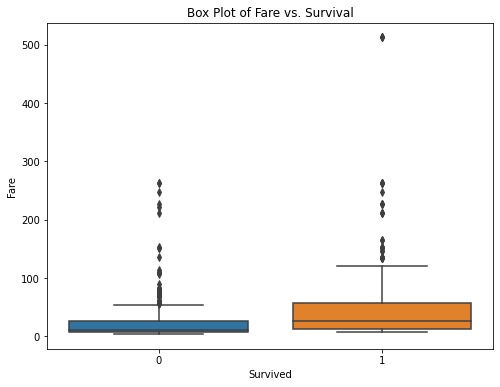

In [5]:
# Visualizing Outliers with a Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title("Box Plot of Fare vs. Survival")
plt.show()

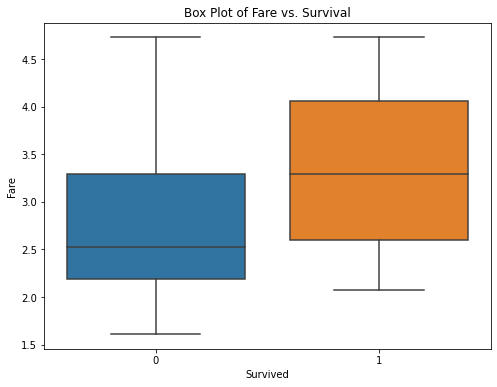

In [6]:
# Log-transform the 'Fare' column
train_data['Fare'] = np.log1p(train_data['Fare'])

# Cap the upper outliers to a certain threshold
upper_threshold = train_data['Fare'].quantile(0.95)
train_data.loc[train_data['Fare'] > upper_threshold, 'Fare'] = upper_threshold

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title("Box Plot of Fare vs. Survival")
plt.show()

<h2> Features engineer </h2>

In [7]:
#create new features Deck
train_data['Deck'] = train_data['Cabin'].str[0]
train_data['Deck'].fillna('Missing', inplace=True)

In [8]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [10]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [11]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
